In [1]:
import datetime as dt
import os, sys
import netCDF4 as nc
import matplotlib as mpl
import numpy as np
import numpy.ma as ma
from scipy.spatial import distance
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import cm
import matplotlib.colors as mpl_colors
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable
from dateutil.relativedelta import relativedelta



import numpy as np
import datetime as dtm
import dateutil.parser as dparser
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# from mpl_toolkits.basemap import Basemap (rotate, ben's suggestion)



from salishsea_tools import geo_tools, viz_tools

get_ipython().magic('matplotlib inline')

In [ ]:
test = True

filesdir = "/ocean/gsgarbi/selected_days/"

dirs = os.listdir(filesdir)



Iona = (-123.30898284912109, 49.187351226806641)
S15 = (-123.3114, 49.130412)
S16 = (-123.317415, 49.1214)
xl=(-126.2,-122.2)
yl=(47.1,51)

In [3]:
def param(timef): #background
    
    size = 5
    ms = 5
    S15 = (-123.3114, 49.130412)
    S16 = (-123.317415, 49.1214) 
    bathy = nc.Dataset("/ocean/gsgarbi/bathy_meter_SalishSea2.nc")
    model_lats = bathy.variables['nav_lat'][:]
    model_lons = bathy.variables['nav_lon'][:]
    depth = bathy.variables['Bathymetry'][:]        
    #End of spit
    late = 49.205
    lone = -123.26
    #Further up spit
    lats = 49.214
    lons = -123.22
        
    dx = 1.2
    lat = late + dx * (late - lats)
    lon = lone + dx * (lone - lons)
    y, x = geo_tools.find_closest_model_point(lon, lat, model_lons, model_lats)

    outy = y - 1
    outx = x - 1
    
    deep = 110
    shallow = 35
    
    time_0 = 0
    
    time_f = 2
    
    new_limx = (-124.5,-122.5)
    
    new_limy = (48.7,49.5)

    
    new_ticksx = (new_limx[0], float(sum(new_limx))/2, new_limx[1])
    
    new_ticksy = (new_limy[0], float(sum(new_limy))/2, new_limy[1])
                       
    
    Iona =(model_lons[outy, outx], model_lats[outy, outx])
    
    
    
    #norm_p = mpl_colors.Normalize(vmin=deep, vmax=shallow)
    
    norm_w = None
    cmap_w = "winter_r"
    
    norm_p = mpl_colors.Normalize(vmin=time_0, vmax=timef*24)
    cmap_p = plt.cm.plasma_r
      

    
   

        
    global fig, axs
    
    fig, axs = plt.subplots(LIN,COL, figsize = (5,4))

    
    if LIN == 1 or COL == 1:
        
        axs=np.reshape(axs,(1,1))
    
    
    
    for j in range(LIN):
        for k in range (COL):
            
            divider = make_axes_locatable(axs[j,k])
            
            cax_w = divider.append_axes("right", size="5%", pad=0.05)
            
            cax_p = divider.append_axes("bottom", size="5%", pad=0.5)
            
            
            cb_w = mpl.colorbar.ColorbarBase(cax_w, 
                                             cmap = mpl.cm.get_cmap('winter_r'),
                                             norm = mpl.colors.Normalize(vmin=shallow, 
                                                                         vmax=deep),
                                             orientation='vertical')

            
            cb_p = mpl.colorbar.ColorbarBase(cax_p, 
                                             cmap = plt.cm.plasma_r,
                                             norm = mpl.colors.Normalize(vmin=0, vmax=timef*24), 
                                            #vmax=date + dt.timedelta(hours = timef*24)),
                                             orientation='horizontal')
            
            
            
            
            
            
            cb_w.set_label("Water depth (m)")
            
            cb_p.set_label("Particle age (hours)")
    
    
    
    
            mesh_w = axs[j,k].pcolormesh(model_lons, model_lats, depth, cmap=cmap_w)
    

            
    
            axs[j,k].set_xlim(new_limx)
            axs[j,k].set_xticks(new_ticksx)
            axs[j,k].set_xticklabels(('%s W' %-new_limx[0], 
                                      '%s W' %-round(float(sum(new_limx))/2,2), 
                                      '%s W' %-new_limx[1]))
            axs[j,k].set_xlabel('Longitude')
            
            axs[j,k].set_ylim(new_limy)
            axs[j,k].set_yticks(new_ticksy)
            axs[j,k].set_yticklabels(('%s N' %new_limy[0], 
                                      '%s N' %round(float(sum(new_limy))/2,1), 
                                      '%s N' %new_limy[1]))
            axs[j,k].set_ylabel('Latitude')
            
            
            #Iona
            axs[j,k].plot(Iona[0], Iona[1], 'wo', ms = ms)
            #New Stations
    
            axs[j,k].plot(S15[0],S15[1], 'wo', ms = ms)
            
            axs[j,k].plot(S16[0],S16[1], 'wo', ms = ms)
            
            axs[j,k].annotate(
            "Iona outfall",
            xy=(model_lons[outy, outx], model_lats[outy, outx]), xytext=(50, 10),
            textcoords='offset points', ha='left', va='bottom',
            #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
            
            axs[j,k].annotate(
            "Station 15",
            xy=(S15[0],S15[1]), xytext=(50, 10),
            textcoords='offset points', ha='left', va='bottom',
            #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
            axs[j,k].annotate(
            "Station 16",
            xy=(S16[0],S16[1]), xytext=(50, 10),
            textcoords='offset points', ha='left', va='top',
            #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        
    

    return axs

# In[31]:|

    


In [4]:
# #72 particulas por dia e 72 pontos por dia por trajetoria

RAWDIR = "/ocean/gsgarbi/ariane_raw/2016+jan2017/"
    
OUTPUTDIR = "/ocean/gsgarbi/selected_days/"

H = 24

pph = 3

ppd = H * pph #(also number of outputs per trajectory per day since we have 3 outputs per hour)


In [5]:
def find_direct (RAWDIR, date, traj_len):
    init_date = date - dt.timedelta(days = traj_len)
    y = str(init_date.year)
    m = str(init_date.month)
    n = str(date.month)
    w = str(date.year)
    


    if len (m) == 1:
        m = "0"+str(m)
        
    if len (n) == 1:
        n = "0"+str(n)
    
    direct = [i for i in os.listdir(RAWDIR) if y+m == i[:6] or w+n == i[:6] ]
    
    print ("got directory")
    
    return direct
    


In [6]:
def get_points(direct, date, traj_len):
    '''
    get pts with fixed traj len
    '''
    pts = []
    init_date = date - dt.timedelta(days = traj_len)
    d = init_date.day
    parts = range (1 + ppd*(d - 1), 1 + ppd*(d - 1) + traj_len * ppd)
    part = parts[0]
    print ("initial date: ", init_date, "\n",
              "final date: ", date, "\n",
              "traj len: ", traj_len,
              "particule #: from {} to {} ".format(1 + ppd*(d - 1), 
                                                   1 + ppd*(d - 1) + traj_len * ppd),
                "num particules: ", traj_len * ppd
              )
    
    allparts = []
    
    for directory in direct:


        with open(RAWDIR + directory + "/traj.txt") as file:



            count = 0
            traj = []


            for i, line in enumerate(file):  
                line = line.strip('\n').split()
                line = [float(k) for k in line]


                if line[0] == part:

                    traj.append(line)
                    count +=1
                if count == traj_len * ppd:
                    allparts.append (part) #72, 71, 70,...
                    pts.append(traj)
                    traj = [] #reset traj
                    count = 0 #reset counter
                    part += 1 #go to the next particle
                    #traj_len -= int(i/3) * 3 #next length will be smaller
                if part == parts[-1]+1:
                    break
            else:
                    print ("month transition -> open next file")


                    parts = range (1, 1 + ppd*(d - 1) + traj_len * ppd - part)
                    part = parts[0]

                




    return pts
    
   

In [7]:
def get_points2(direct, date, traj_len, diff_m = False):
    '''
    get pts with fixed traj len
    '''
    
    if len (direct)  > 1:
        diff_m = True

    if not diff_m:
        
        pts = []

        init_date = date - dt.timedelta(days = traj_len)
        d = init_date.day

        print ("initial date: ", init_date, "\n",
              "final date: ", date, "\n",
              "traj len: ", traj_len,
              "particule #: from {} to {} ".format(1 + ppd*(d - 1), 
                                                   1 + ppd*(d - 1) + traj_len * ppd),
                "num particules: ", traj_len * ppd
              )





        parts = range (1 + ppd*(d - 1), 1 + ppd*(d - 1) + traj_len * ppd)
        part = parts[0]

        with open(RAWDIR + direct[0] + "/traj.txt") as file:



            count = 0
            traj = []


            for i, line in enumerate(file):                  
                line = line.strip('\n').split()
                line = [float(k) for k in line]
                if line[0] == part:
                    traj.append(line)
                    count +=1
                if count == traj_len * ppd: #72, 71, 70,...
                    pts.append(traj)
                    traj = [] #reset traj
                    count = 0 #reset counter
                    part += 1 #go to the next particle
                    #traj_len -= int(i/3) * 3 #next length will be smaller
                if part == parts[-1]+1:
                    break 




        return pts
    
    if diff_m:
        
        pts = []

        init_date = date - dt.timedelta(days = traj_len)
        d = init_date.day

        print ("initial date: ", init_date, "\n",
              "final date: ", date, "\n",
              "traj len: ", traj_len,
              "particule #: from {} to {} ".format(1 + ppd*(d - 1), 
                                                   1 + ppd*(d - 1) + traj_len * ppd),
                "num particules: ", traj_len * ppd
              )





        parts = range (1 + ppd*(d - 1), 1 + ppd*(d - 1) + traj_len * ppd)
        part = parts[0]

        with open(RAWDIR + direct[0] + "/traj.txt") as file:



            count = 0
            traj = []


            for i, line in enumerate(file):                  
                line = line.strip('\n').split()
                line = [float(k) for k in line]
                if line[0] == part:
                    traj.append(line)
                    count +=1
                if count == traj_len * ppd: #72, 71, 70,...
                    pts.append(traj)
                    if traj == []:
                        break

            
        with open(RAWDIR + direct[1] + "/traj.txt") as file:
            count = 0
            traj = []


            for i, line in enumerate(file):                  
                line = line.strip('\n').split()
                line = [float(k) for k in line]
                if line[0] == part:
                    traj.append(line)
                    count +=1
                if count == traj_len * ppd: #72, 71, 70,...
                    pts.append(traj)
                    if traj == []:
                        break
                    traj = [] #reset traj
                    count = 0 #reset counter
                    part += 1 #go to the next particle
                    #traj_len -= int(i/3) * 3 #next length will be smaller
                if part == parts[-1]+1:
                    break 


        return pts



In [8]:
LIN = 1
COL = 1                                                                        

                 

                                                       


test
2016-07-19 00:00:00
got directory
direct:  ['20160701_20160731_252d']
initial date:  2016-07-16 00:00:00 
 final date:  2016-07-19 00:00:00 
 traj len:  3 particule #: from 1081 to 1297  num particules:  216
saved in:  /ocean/gsgarbi/MEOPAR/private-docs/reports/IonaProject/ionafigs/cs_07_19_2016_3d_45_test.png


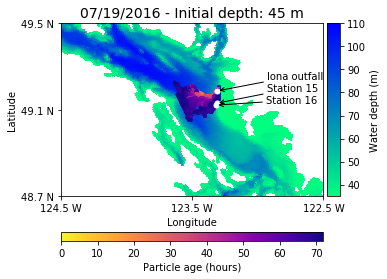

saved in:  /ocean/gsgarbi/MEOPAR/private-docs/reports/IonaProject/ionafigs/cs_07_19_2016_3d_59_test.png


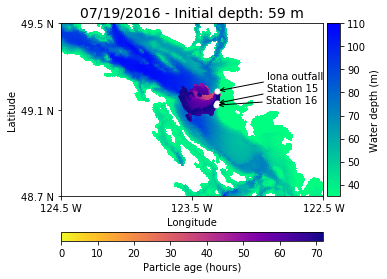

saved in:  /ocean/gsgarbi/MEOPAR/private-docs/reports/IonaProject/ionafigs/cs_07_19_2016_3d_77_test.png


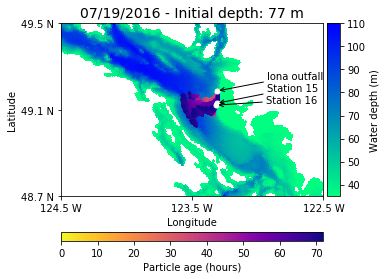

2016-08-02 00:00:00
got directory
direct:  ['20160801_20160831_217d', '20160701_20160731_252d']
initial date:  2016-07-30 00:00:00 
 final date:  2016-08-02 00:00:00 
 traj len:  3 particule #: from 2089 to 2305  num particules:  216
month transition -> open next file
saved in:  /ocean/gsgarbi/MEOPAR/private-docs/reports/IonaProject/ionafigs/cs_08_02_2016_3d_45_test.png


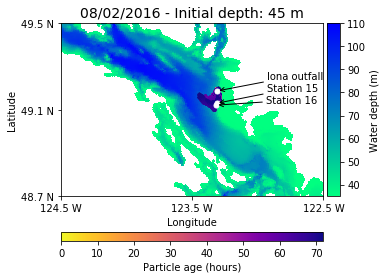

saved in:  /ocean/gsgarbi/MEOPAR/private-docs/reports/IonaProject/ionafigs/cs_08_02_2016_3d_59_test.png


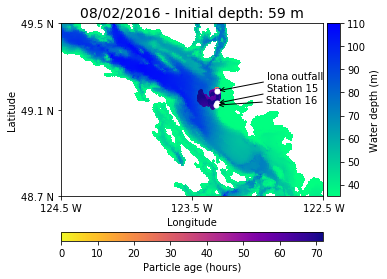

saved in:  /ocean/gsgarbi/MEOPAR/private-docs/reports/IonaProject/ionafigs/cs_08_02_2016_3d_77_test.png


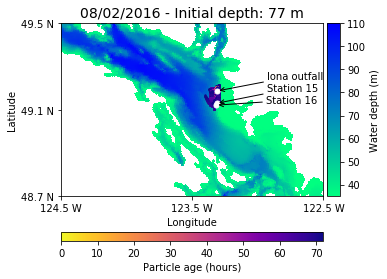

In [25]:
test_version = True

if test_version:
    print ("test")

traj_len = 3

times = np.array(
    [
    dt.datetime(2016, 7, 19),
    dt.datetime(2016, 7, 26),
    dt.datetime(2016, 8, 2),
    dt.datetime(2016, 8, 9),
    dt.datetime(2016, 8, 16),
    dt.datetime(2016, 8, 23),
    ]
                            )

init_depths = [45,59,77]

test = times_day_before = np.array(
    [


    dt.datetime(2016, 7, 19),
    dt.datetime(2016, 8, 2)


    ]
                            )


for date in test:
    
    print (date)



    direct = find_direct(RAWDIR, date, traj_len)
    print ("direct: ", direct)



    pts = get_points(direct, date, traj_len)




    init_date = date - dt.timedelta(days = traj_len)

    for i_0 in range(3):
        
        END = len(pts[i_0::3][0])
        


        axs = param(traj_len)
        
        T = 0
        


        for num, part in enumerate(pts[i_0::3]):
            
            

            
            
            part = part[:-(num*3 +1)] #cut the end of traj

            end = len(part)
            




            for t in range (end):
                
                #T = 3*(date - init_date) + t
                

                scaled_t = 1-(END - (t + T) ) / END
                cmap = plt.cm.plasma_r
                color = cmap(scaled_t)
                axs[0,0].scatter(part[t][1], part[t][2], s = 2,
                                 c = color, edgecolor = None)
                fdate1 = date.strftime('%m/%d/%Y')
                fdate2 = date.strftime('%m_%d_%Y')
                
                axs[0,0].set_title(fdate1 + 
                                   " - Initial depth: {} m".format(init_depths[i_0]),
                                  fontsize = 14) 
            
            T += 3

                                                        

        dirs = "/ocean/gsgarbi/MEOPAR/private-docs/reports" + "/IonaProject/ionafigs/cs_{}_{}d_{}.png".format(fdate2, 
                                                             traj_len, 
                                                             init_depths[i_0])
        

        
        if test_version:
            
            dirs = dirs [:-4] + "_test" + dirs [-4:]  

            
        plt.savefig(fig.savefig(dirs, dpi = 400 ) )
        
        print ("saved in: ", dirs)
                                                        
        
        plt.show()




#         viz_tools.set_aspect(axs[0,0])
    







In [ ]:
print ("ionafigs/cs_{}_{}d_{}.png".format(fdate2, 
                                                         traj_len, 
                                                         init_depths[i_0]))